In [2]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [9]:
from datasets.fishtox import FishTox
dataset = FishTox('../data')

smile = dataset.smiles[10]

In [56]:

#any model weights from the link above will work here



Some weights of the model checkpoint at seyonec/ChemBERTa-zinc-base-v1 were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [75]:
token_ids = torch.LongTensor(tokenizer.encode(smile)).unsqueeze(0)


AttributeError: 'FishTox' object has no attribute 'smile'

In [72]:
token_ids.shape, out.hidden_states[-1].mean(1).shape

(torch.Size([1, 8]), torch.Size([1, 768]))

In [69]:
model.encode

AttributeError: 'RobertaForMaskedLM' object has no attribute 'encode'

In [3]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open the file in binary write mode and save the content
    with open(file_path, 'wb') as f:
        f.write(response.content)
    print(f"File downloaded and saved as {file_path}")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

200

In [5]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open the file in binary write mode and save the content
    with open(file_path, 'wb') as f:
        f.write(response.content)
    print(f"File downloaded and saved as {file_path}")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

File downloaded and saved as model_checkpoint.zip


In [87]:
from typing import Optional
from transformers import AutoModelWithLMHead, AutoTokenizer

from fingerprint.base import Fingerprinter



class ChemBERTaFingerprinter(Fingerprinter):
    name = 'ChemBERT'
    n_dim = 768
    DEFAULT_MODEL = 'seyonec/ChemBERTa-zinc-base-v1'
    
    def __init__(self, verbose: bool = True, pretrained_model_name_or_path: Optional[str] = None):
        super().__init__(verbose=verbose)
        if pretrained_model_name_or_path is None:
            pretrained_model_name_or_path = self.DEFAULT_MODEL
        
        self.model = AutoModelWithLMHead.from_pretrained(pretrained_model_name_or_path, output_hidden_states=True)
        self.tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path)
        self.model.eval()
        
    def encode(self, smile: str) -> np.ndarray:
        with torch.no_grad():
            out = self.model(**self.tokenizer(smile, return_tensors='pt'))
            fingerprint = out.hidden_states[-1].mean(1).data.numpy()
        
        assert fingerprint.shape[-1] == self.n_dim
        return fingerprint


In [88]:
fingerprinter = ChemBERTaFingerprinter()

/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/transformers/models/auto/modeling_auto.py:1581: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
Some weights of the model checkpoint at seyonec/ChemBERTa-zinc-base-v1 were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassificatio

In [89]:
fingerprints = fingerprinter(dataset.smiles)

100%|██████████| 907/907 [00:09<00:00, 93.71it/s] 


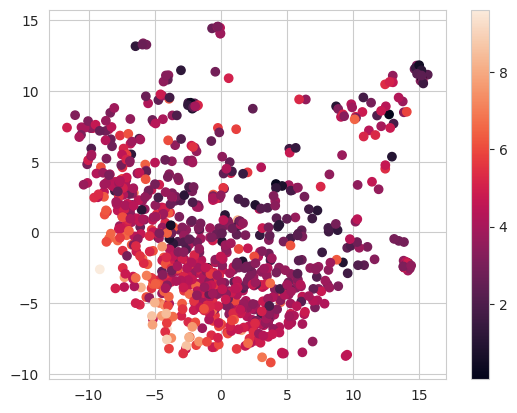

In [92]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

proj = PCA(2)

plt.scatter(*proj.fit_transform(fingerprints).T, c=dataset.y)
plt.colorbar()

In [ ]:
!rm /data/models/molbert_100epochs.zip